In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_excel('Base/TH_ASIS_B1000.xlsx', sheet_name='Sheet1')
data_c1 = pd.read_excel('SC1/TH_ASIS_B1000.xlsx', sheet_name='Sheet1')
data_c2 = pd.read_excel('SC2/TH_ASIS_B1000.xlsx', sheet_name='Sheet1')
data_c3 = pd.read_excel('SC3/TH_ASIS_B1000.xlsx', sheet_name='Sheet1')

data_lt = pd.read_excel('Base/TH_ASIS_B1000_lt.xlsx', sheet_name='Sheet1')

data_500 = pd.read_excel('Base/TH_ASIS_B500.xlsx', sheet_name='Sheet1')
#data_c1_500 = pd.read_excel('SC1/WIP_ASIS_B500.xlsx', sheet_name='Sheet1')
#data_c2_500 = pd.read_excel('SC2/WIP_ASIS_B500.xlsx', sheet_name='Sheet1')
#data_c3_500 = pd.read_excel('SC3/WIP_ASIS_B500.xlsx', sheet_name='Sheet1')

data_500_lt = pd.read_excel('Base/TH_ASIS_B500_lt.xlsx', sheet_name='Sheet1')
#data_c1_500 = pd.read_excel('SC1/WIP_ASIS_B500.xlsx', sheet_name='Sheet1')
#data_c2_500 = pd.read_excel('SC2/WIP_ASIS_B500.xlsx', sheet_name='Sheet1')
#data_c3_500 = pd.read_excel('SC3/WIP_ASIS_B500.xlsx', sheet_name='Sheet1')

data_50 = pd.read_excel('Base/TH_ASIS_B50.xlsx', sheet_name='Sheet1')
#data_c1_500 = pd.read_excel('SC1/WIP_ASIS_B500.xlsx', sheet_name='Sheet1')
#data_c2_500 = pd.read_excel('SC2/WIP_ASIS_B500.xlsx', sheet_name='Sheet1')
#data_c3_500 = pd.read_excel('SC3/WIP_ASIS_B500.xlsx', sheet_name='Sheet1')


data_50_lt = pd.read_excel('Base/TH_ASIS_B50_lt.xlsx', sheet_name='Sheet1')
#data_c1_500 = pd.read_excel('SC1/WIP_ASIS_B500.xlsx', sheet_name='Sheet1')
#data_c2_500 = pd.read_excel('SC2/WIP_ASIS_B500.xlsx', sheet_name='Sheet1')
#data_c3_500 = pd.read_excel('SC3/WIP_ASIS_B500.xlsx', sheet_name='Sheet1')

In [3]:
data = data.iloc[::2]
data_c1 = data_c1.iloc[::2]
data_c2 = data_c2.iloc[::2]
data_c3 = data_c3.iloc[::2]

data_lt = data_lt.iloc[::2]

data_500 = data_500.iloc[::2]
data_500_lt = data_500_lt.iloc[::2]

data_50 = data_50.iloc[::2]
data_50_lt = data_50_lt.iloc[::2]

In [4]:
print(data.head(10))

    Time   A   B   C   D   E   F   G   H
0      0   0   0   0   0   0   0   0   0
2      5   1   0   2   0   1   0   0   2
4     10   2   2   4   2   2   2   2   4
6     15   4   4   6   4   4   4   4   6
8     20   6   6   8   4   6   5   6   7
10    25   6   8  10   6   8   6   8   8
12    30   8  10  12   8  10   8  10  10
14    35  10  11  14   8  12  10  12  12
16    40  12  13  16  11  14  10  13  14
18    45  12  14  18  12  16  12  16  16


In [5]:
#Define the time you are running your model
T = 7*24*60

assy = data.iloc[-1]
assy_500 = data_500.iloc[-1]
assy_50 = data_50.iloc[-1]

assy_c1 = data_c1.iloc[-1]
assy_c2 = data_c2.iloc[-1]
assy_c3 = data_c3.iloc[-1]

TH = assy/T
TH_500 = assy_500/T
TH_50 = assy_50/T
TH_c1 = assy_c1/T
TH_c2 = assy_c2/T
TH_c3 = assy_c3/T

TH = TH.iloc[1:]
TH_500 = TH_500.iloc[1:]
TH_50 = TH_50.iloc[1:]
TH_c1 = TH_c1.iloc[1:]
TH_c2 = TH_c2.iloc[1:]
TH_c3 = TH_c3.iloc[1:]

In [6]:
assy_df = assy.to_frame()
assy_df = assy_df.T
assy_df = assy_df.drop('Time',1)


In [7]:
assy_df

,A,B,C,D,E,F,G,H
4032,3020,3258,4032,3020,3562,3020,3992,3656


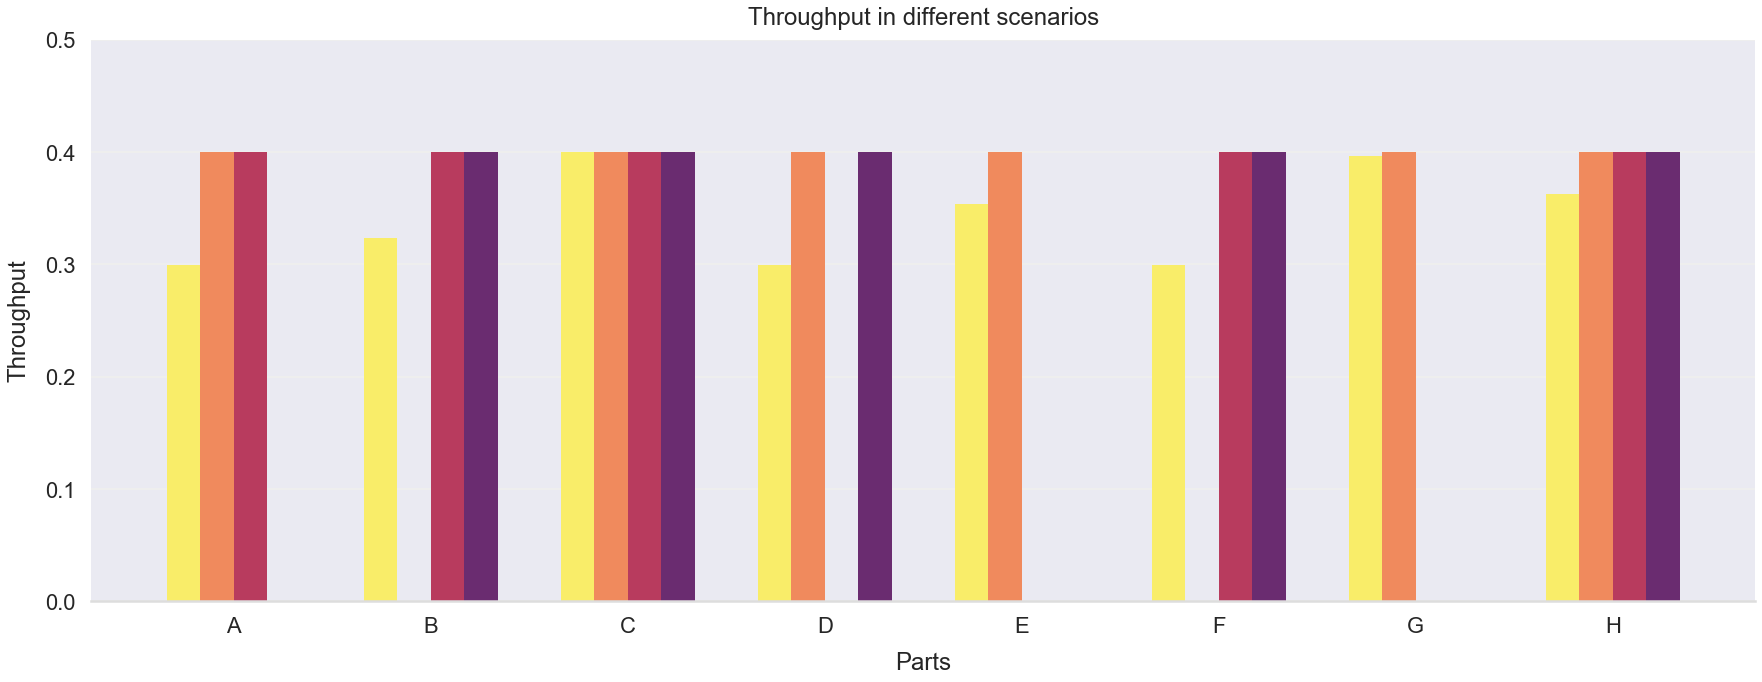

In [10]:
import seaborn as sns
sns.set_context('poster')


fig, ax = plt.subplots(figsize=(25, 10))

x = np.arange(len(assy_df.columns))

bar_width = 0.17

b0 = ax.bar(x, TH, width=bar_width,color = "#f9ed69", label ='Base')
b1 = ax.bar(x + bar_width, TH_c1,width=bar_width,color="#f08a5d", label='Scenario 1')
b2 = ax.bar(x + 2*bar_width, TH_c2, width=bar_width,color="#b83b5e",label='Scenario 2')
b3 = ax.bar(x + 3*bar_width, TH_c3, width=bar_width,color="#6a2c70",label='Scenario 3')



# Fix the x-axes.
ax.set_xticks(x + 1.5*bar_width)
ax.set_xticklabels(assy_df.columns)


# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.ylim([0, 0.5])

# Add axis and chart labels.
ax.set_xlabel('Parts', labelpad=15)
ax.set_ylabel('Throughput', labelpad=15)
ax.set_title('Throughput in different scenarios', pad=15)

#plt.legend(bbox_to_anchor=(0.2,-0.3,0.5,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=4)

fig.tight_layout()
plt.savefig('TH_ASIS.png', transparent=True, dpi=200)

In [11]:
TH_df = pd.DataFrame({'x':data['Time'],'TH_A': data['A']/data['Time'],'TH_B': data['B']/data['Time'],'TH_C': data['C']/data['Time'],'TH_D': data['D']/data['Time'],'TH_E': data['E']/data['Time'],'TH_F': data['F']/data['Time'],'TH_G': data['G']/data['Time'],'TH_H': data['H']/data['Time']})
#df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14) })

copy_TH_df = TH_df.copy()
del copy_TH_df['x']
TH_df['TH_mean'] = copy_TH_df.mean(numeric_only=True, axis=1)
TH_df = TH_df[:700] #keep top 3000
TH_df

,x,TH_A,TH_B,TH_C,TH_D,TH_E,TH_F,TH_G,TH_H,TH_mean
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,0.200000,0.000000,0.4,0.000000,0.200000,0.000000,0.000000,0.400000,0.150000
4,10,0.200000,0.200000,0.4,0.200000,0.200000,0.200000,0.200000,0.400000,0.250000
6,15,0.266667,0.266667,0.4,0.266667,0.266667,0.266667,0.266667,0.400000,0.300000
8,20,0.300000,0.300000,0.4,0.200000,0.300000,0.250000,0.300000,0.350000,0.300000
...,...,...,...,...,...,...,...,...,...,...
1390,3475,0.291799,0.323453,0.4,0.291799,0.350216,0.291799,0.397698,0.361439,0.338525
1392,3480,0.291954,0.323563,0.4,0.291954,0.350000,0.291954,0.397701,0.361494,0.338578
1394,3485,0.292109,0.323386,0.4,0.291535,0.350072,0.292109,0.397704,0.361549,0.338558
1396,3490,0.291691,0.323496,0.4,0.291691,0.350143,0.291691,0.397708,0.361605,0.338503


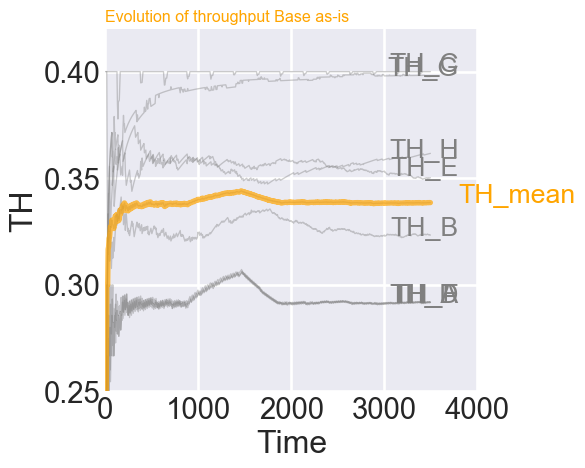

In [12]:
 #plt.style.use('fivethirtyeight')
plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# multiple line plot
for column in TH_df.drop('x', axis=1):
   plt.plot(TH_df['x'], TH_df[column], marker='', color='grey', linewidth=1, alpha=0.4)
 
# Now re do the interesting curve, but biger with distinct color
plt.plot(TH_df['x'], TH_df['TH_mean'], marker='', color='orange', linewidth=4, alpha=0.7)
 
# Change xlim
plt.xlim(0,4000)
plt.ylim(ymin = 0.25)
 
# Let's annotate the plot
num=0
for i in TH_df.values[650][1:]:
   num+=1
   name=list(TH_df)[num]
   if name != 'TH_mean':
      plt.text(3800, i, name, horizontalalignment='right', size='small', color='grey')
 
# And add a special annotation for the group we are interested in
plt.text(3800, TH_df.TH_mean.tail(1), 'TH_mean', horizontalalignment='left', size='small', color='orange')
 
# Add titles
plt.title("Evolution of throughput Base as-is", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("TH")

plt.savefig('TH_time.png', dpi=400)

In [19]:
TH.mean()

0.3417658730158731

In [20]:
TH_500.mean()

0.3371031746031746

In [21]:
TH_50.mean()

0.3243799603174603

In [22]:
assy

Time    10080
A        3020
B        3258
C        4032
D        3020
E        3562
F        3020
G        3992
H        3656
Name: 4032, dtype: int64

In [26]:
assy_c1

Time    10080
A        4030
B           0
C        4032
D        4030
E        4032
F           0
G        4030
H        4031
Name: 4032, dtype: int64

In [24]:
assy_50

Time    10080
A        2570
B        3752
C        4032
D        2570
E        2652
F        2572
G        4030
H        3980
Name: 2652, dtype: int64

In [25]:
TH

A    0.299603
B    0.323214
C    0.400000
D    0.299603
E    0.353373
F    0.299603
G    0.396032
H    0.362698
Name: 4032, dtype: float64

In [30]:
((5*30000)/(10080*6000))*8

0.01984126984126984